# Analysis on the students attenton


First of all, the necessary imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import random
from IPython.display import clear_output
import time

Then reading the 80 csv files, getting the time etiquete, which is not set, join all the csv files and sort them by time. Important to mention that this is NOT part of the model. Only for data analysis and estimations before the model

In [2]:
# Read the debugging-performance file apart so that we can add a column to the actual data with the score 
debugging = pd.read_csv("applied-data-science-dataset/debugging-performance.csv")
# Make our way easier to handle which participant have which performance
performance_dict = dict(zip(debugging['participant'], debugging['performance']))

# List to store the individual dataframes
dataframes = []

# Keep in mind that the debugging performance file is not taken into account 
for i in range(1, 81):
    if i < 10:
        file = f"applied-data-science-dataset/P0{i}.csv"
    else:
        file = f"applied-data-science-dataset/P{i}.csv"
    
    df = pd.read_csv(file)
    
    df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    
    name = f'P{i:02}'
    df['Source'] = name
    df['Performance'] = performance_dict[name]
    
    # Append the dataframe to the list
    dataframes.append(df)

# Now that all dataframes are loaded and sorted by 'Time', concatenate them
# This time, concatenate across columns for each 'Time' value
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.sort_values(by=['Time', 'Source'], inplace=True)

# Reset index after sorting to maintain continuous indexing
combined_df.reset_index(drop=True, inplace=True)

# Save the final combined dataframe to a CSV file
combined_df.to_csv("combined_dataset.csv", index=False)


## Training and Test data
Now we can focus on preprocessing data: Since the column of "Time" isn't set propertly, we can fix that manually, then, pick our training and testing data (only once) by random, the distribution would be 60-20 since is the closest to 2/3 - 1/3 that could work for our model

### DO NOT EXECUTE THIS CODE, THIS ALREADY RANDOMLY GENERATED THE TRAIN AND TEST DATA


In [10]:
"""
# This line could be not necessary, but this way, cells can be executed independently
file_paths = glob.glob("applied-data-science-dataset/P*.csv")
# Read the debugging-performance file apart so that we can add a column to the actual data with the score 
debugging = pd.read_csv("applied-data-science-dataset/debugging-performance.csv")
# Make our way easier to handle which participant have which performance
performance_dict = dict(zip(debugging['participant'], debugging['performance']))

# Pick randomly 60 students
training_files = random.sample(file_paths, 60)

testing_files = list(set(file_paths) - set(training_files))

training_files.sort()
testing_files.sort()


# Function to load, rename the time column, and return the DataFrame
def load_and_prepare_csv(file):
    df = pd.read_csv(file)
    df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True) 
    name = f'P{int(file[30:32]):02}'
    df['Source'] = name
    df['debuggingPerformance'] = performance_dict[name]
    return df

# Concatenate the training CSVs
training_dfs = [load_and_prepare_csv(file) for file in training_files]
training_df = pd.concat(training_dfs, ignore_index=True)

# Concatenate the testing CSVs
testing_dfs = [load_and_prepare_csv(file) for file in testing_files]
testing_df = pd.concat(testing_dfs, ignore_index=True)

# Sort both datasets by 'Time' and by the students name (added that column so it's easier to identify them)
training_df.sort_values(by=['Time', 'Source'], inplace=True)
testing_df.sort_values(by=['Time', 'Source'], inplace=True)

training_df.to_csv("model_data/training_dataset.csv", index=False)
testing_df.to_csv("model_data/testing_dataset.csv", index=False)
"""

'\n# This line could be not necessary, but this way, cells can be executed independently\nfile_paths = glob.glob("applied-data-science-dataset/P*.csv")\n# Read the debugging-performance file apart so that we can add a column to the actual data with the score \ndebugging = pd.read_csv("applied-data-science-dataset/debugging-performance.csv")\n# Make our way easier to handle which participant have which performance\nperformance_dict = dict(zip(debugging[\'participant\'], debugging[\'performance\']))\n\n# Pick randomly 60 students\ntraining_files = random.sample(file_paths, 60)\n\ntesting_files = list(set(file_paths) - set(training_files))\n\ntraining_files.sort()\ntesting_files.sort()\n\n\n# Function to load, rename the time column, and return the DataFrame\ndef load_and_prepare_csv(file):\n    df = pd.read_csv(file)\n    df.rename(columns={\'Unnamed: 0\': \'Time\'}, inplace=True) \n    name = f\'P{int(file[30:32]):02}\'\n    df[\'Source\'] = name\n    df[\'debuggingPerformance\'] = perf

Once the training data and testing data are separated, we can make the rest of the pre-processing

In [11]:
training_data = pd.read_csv("model_data/training_dataset.csv")
test_data = pd.read_csv("model_data/testing_dataset.csv")

# Now, the point of preprocessing, would be to fill the missing values, in our case with the mean
def fill_missing_values(data):
    # Select only numeric columns (excluding 'Source')
    numeric_columns = data.select_dtypes(include=['number']).columns.difference(['Source'])

    # Fill missing values with the mean of each column for the same time,
    # excluding the 'Source' columns
    filled_data = data.copy()  # Create a copy to avoid modifying the original data
    # Fill the missing values with the mean of the values in the same second and in the same column
    filled_data[numeric_columns] = filled_data.groupby('Time')[numeric_columns].transform(lambda group: group.fillna(group.mean()))

    return filled_data
# But since none of the datasets have missing values, theres hardly a point in doing this:
training_data2 = fill_missing_values(training_data)
test_data2 = fill_missing_values(test_data)
# And as expected, the data is the same as before treating the missing values
print(f"Is the training data equal than before the missing values? --> {training_data.equals(training_data2)}")
print(f"Is the testing data equal than before the missing values? --> {test_data.equals(test_data2)}")
# The same could be said about scalating the values, but other than the actual time
# (which we dont want to scalate) the values are already scalated.
def scalate_data(data, columns_to_scale, scaler):
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df

# And finally, depending on which metric we are going to choose for training 
# (which for example, can be the debugging performance) and split the data accordingly

X_train, y_train = training_data.drop(columns=['debuggingPerformance']), training_data['debuggingPerformance']
 
X_test, y_test  = test_data.drop(columns=['debuggingPerformance']), test_data['debuggingPerformance']


Is the training data equal than before the missing values? --> True
Is the testing data equal than before the missing values? --> True


## Graphs

We will start with a heatmap correlation map

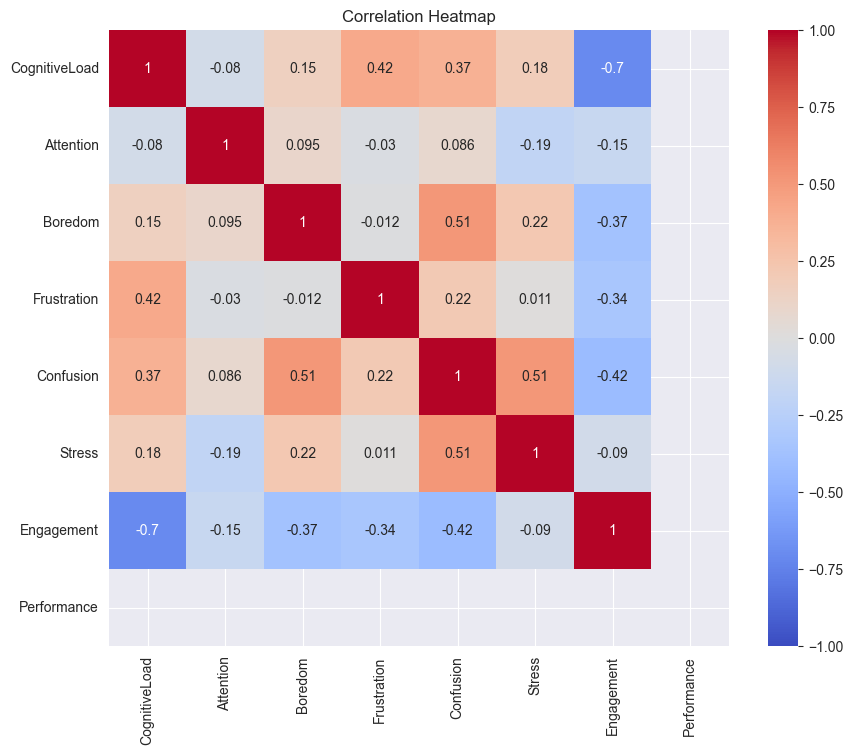

In [3]:
# Correlation Heatmap for all metrics
def plot_correlation_heatmap(df):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement', 'Performance']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[metrics].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)


Then, a plot of how the metrics change over time for each performance group

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10312\3520274127.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


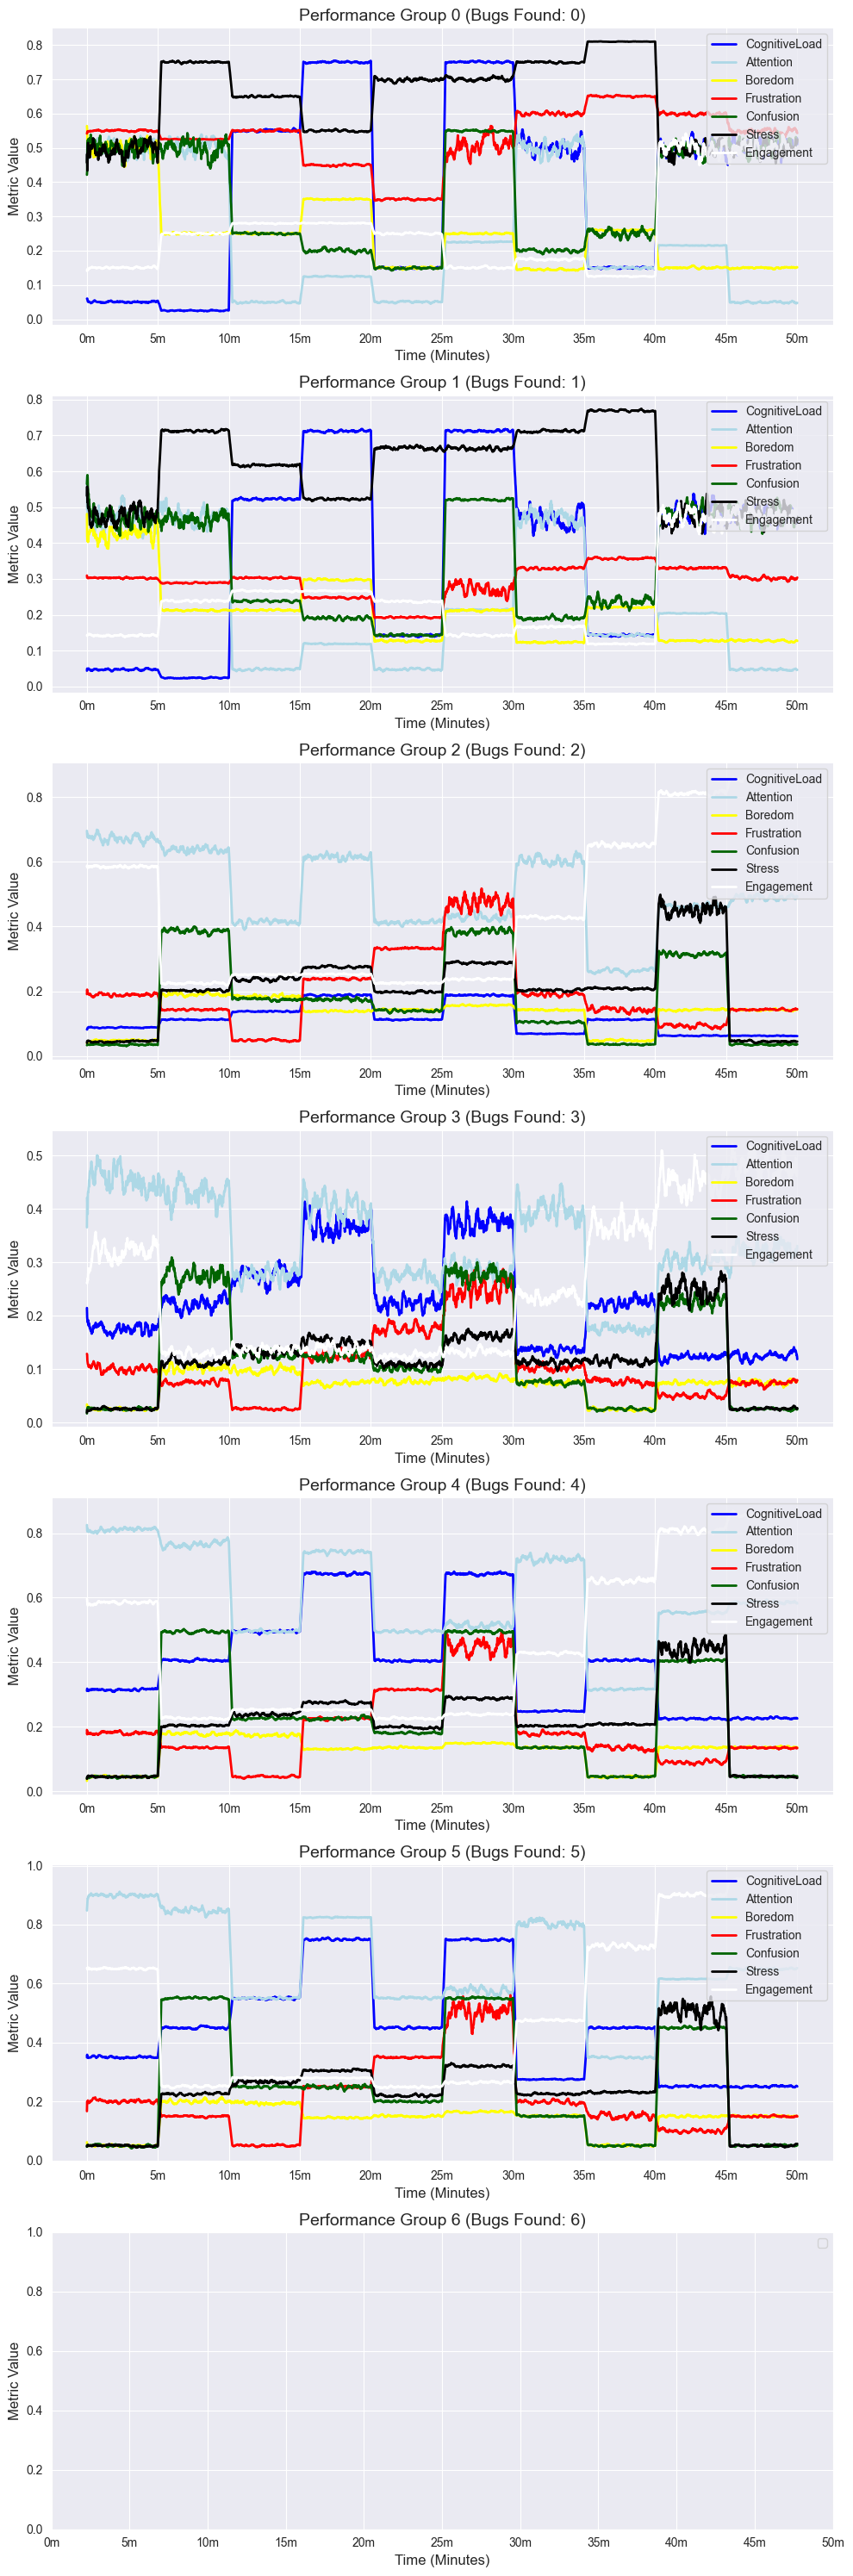

In [4]:
# Load the dataset
file_path = 'combined_dataset.csv'
df = pd.read_csv(file_path)

# Define the list of metrics
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']

# Set the window size for smoothing
window_size = 15

# Prepare a dictionary to hold the averages for each performance group
grouped_averages = {}

# Loop through each performance level from 0 to 6
for performance in range(7):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    # Compute the average of each metric for each second
    averages_over_time = performance_group.groupby('Time')[metrics].mean()
    
    # Apply a rolling window to smooth the data
    smoothed_averages = averages_over_time.rolling(window=window_size, min_periods=1).mean()
    
    # Store the result in the dictionary
    grouped_averages[performance] = smoothed_averages


color_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#000000', '#FFFFFF']

# Set up a grid of subplots for the 7 performance groups
fig, axes = plt.subplots(7, 1, figsize=(10, 30))
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds


# Plot each group's averages over time
for performance, ax in zip(grouped_averages.keys(), axes):
    for metric, color in zip(metrics, color_palette):
        sns.lineplot(x=grouped_averages[performance].index, y=grouped_averages[performance][metric], 
                     ax=ax, label=metric, color=color, linewidth=2)
    
    ax.set_title(f'Performance Group {performance} (Bugs Found: {performance})', fontsize=14)
    ax.set_ylabel('Metric Value', fontsize=12)
    ax.legend(loc='upper right')
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax.set_xlabel('Time (Minutes)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


For the third plot, we will plot of how each metric change over time for different performance groups in the same plot

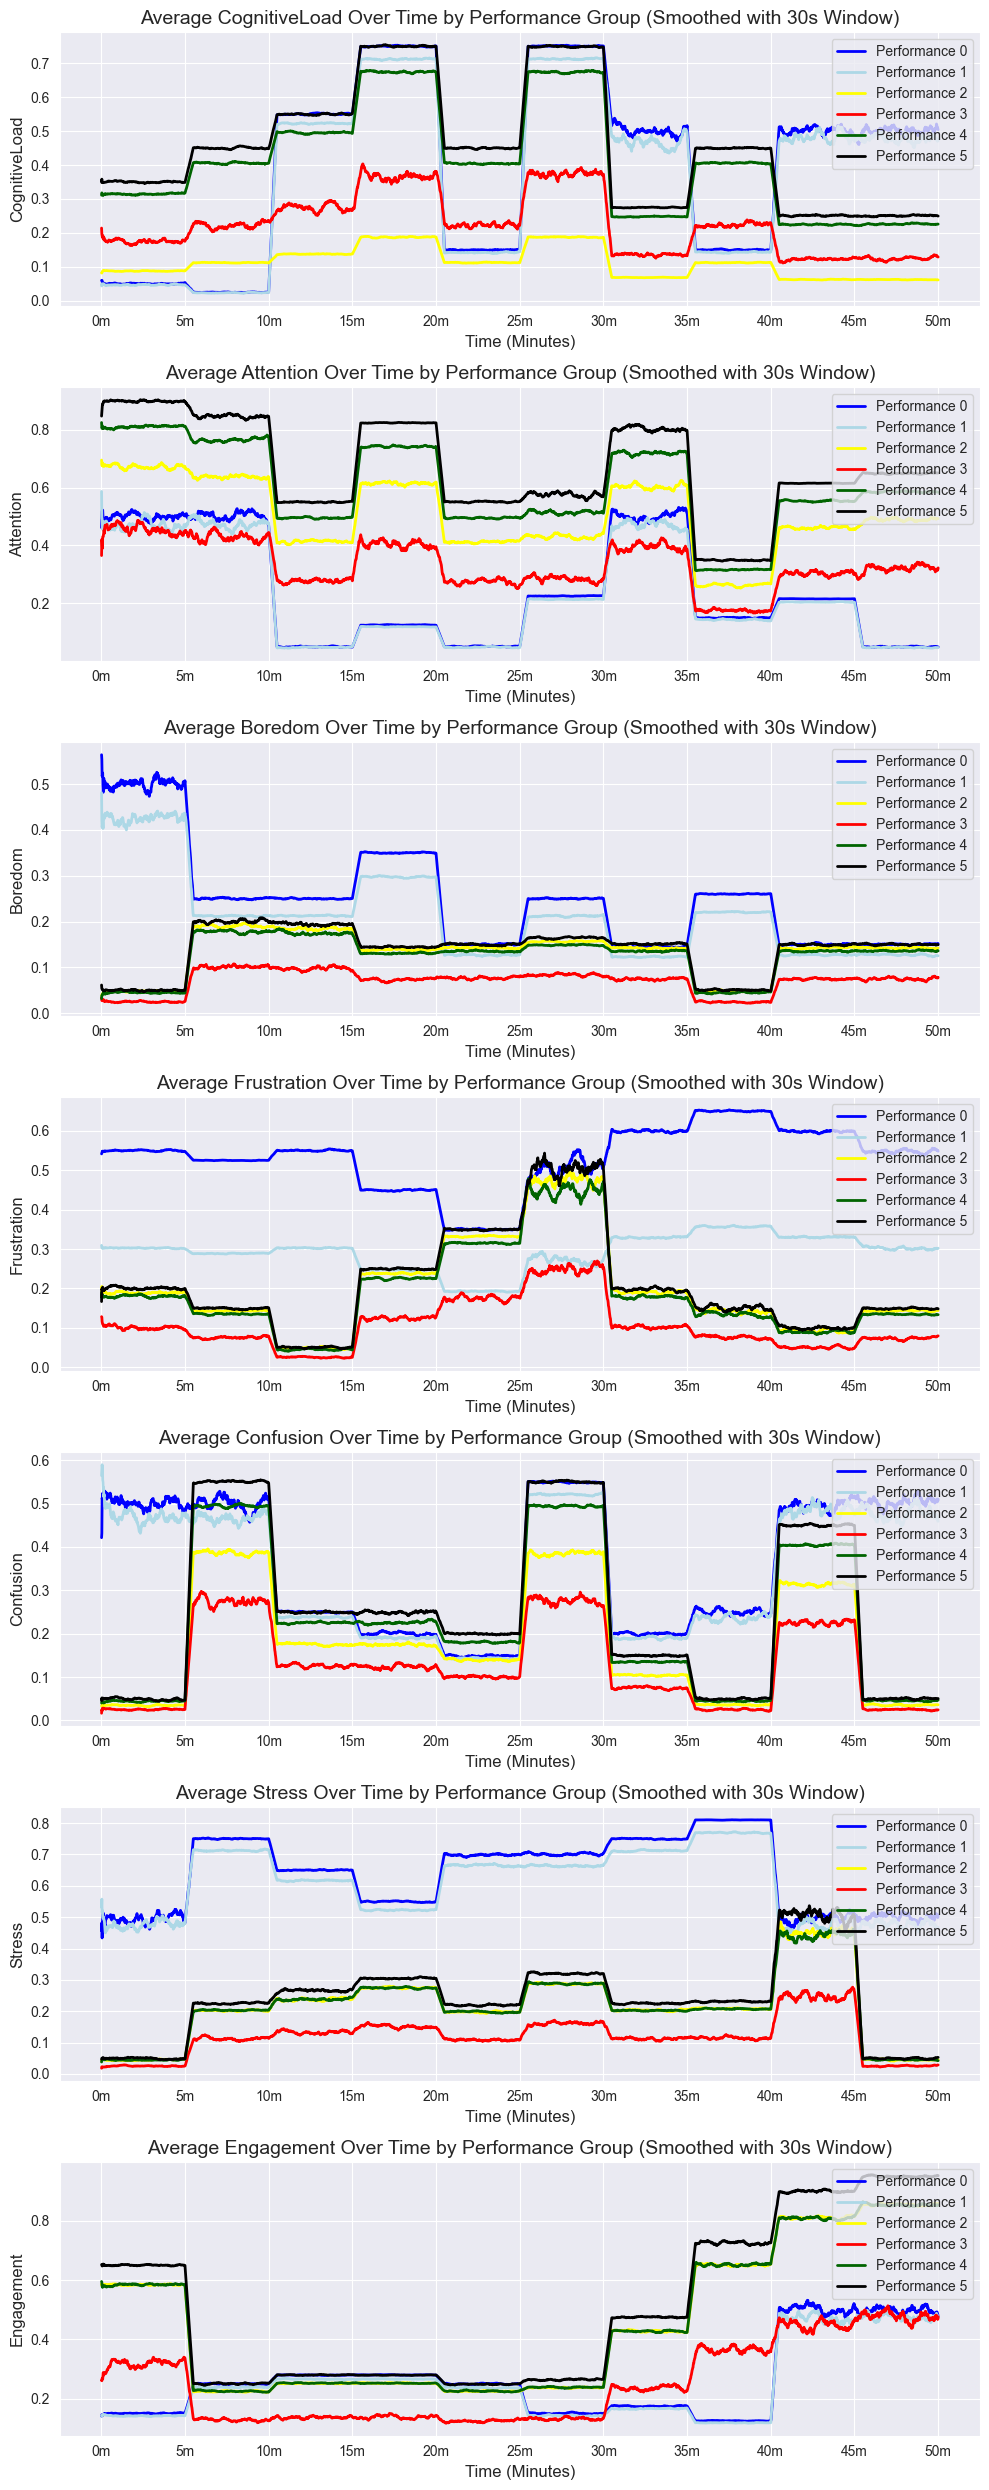

In [5]:

# Group data by 'Performance' and calculate the average for each second
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']

# Set the window size for smoothing
window_size = 30

# Prepare a dictionary to hold the averages for each performance group
grouped_averages = {}

# Loop through each performance level from 0 to 6
for performance in range(7):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    # Compute the average of each metric for each second
    averages_over_time = performance_group.groupby('Time')[metrics].mean()
    
    # Apply a rolling window to smooth the data
    smoothed_averages = averages_over_time.rolling(window=window_size, min_periods=1).mean()
    
    # Store the result in the dictionary
    grouped_averages[performance] = smoothed_averages

# Plot the results using custom color palette
custom_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#000000', '#FFFFFF']

# Set up a figure for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 25))

# Set the ticks for the x-axis to display every 300 seconds
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds

# Plot each metric across performance groups
for metric, ax in zip(metrics, axes):
    for performance, color in zip(grouped_averages.keys(), custom_palette):
        sns.lineplot(x=grouped_averages[performance].index, y=grouped_averages[performance][metric], 
                     ax=ax, label=f'Performance {performance}', color=color, linewidth=2)
    
    ax.set_title(f'Average {metric} Over Time by Performance Group (Smoothed with {window_size}s Window)', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.legend(loc='upper right')
    
    # Set x-axis ticks to show time every 300 seconds for every plot
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax.set_xlabel('Time (Minutes)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



The next plot shows of how each metric change over time for a random student in each performance group

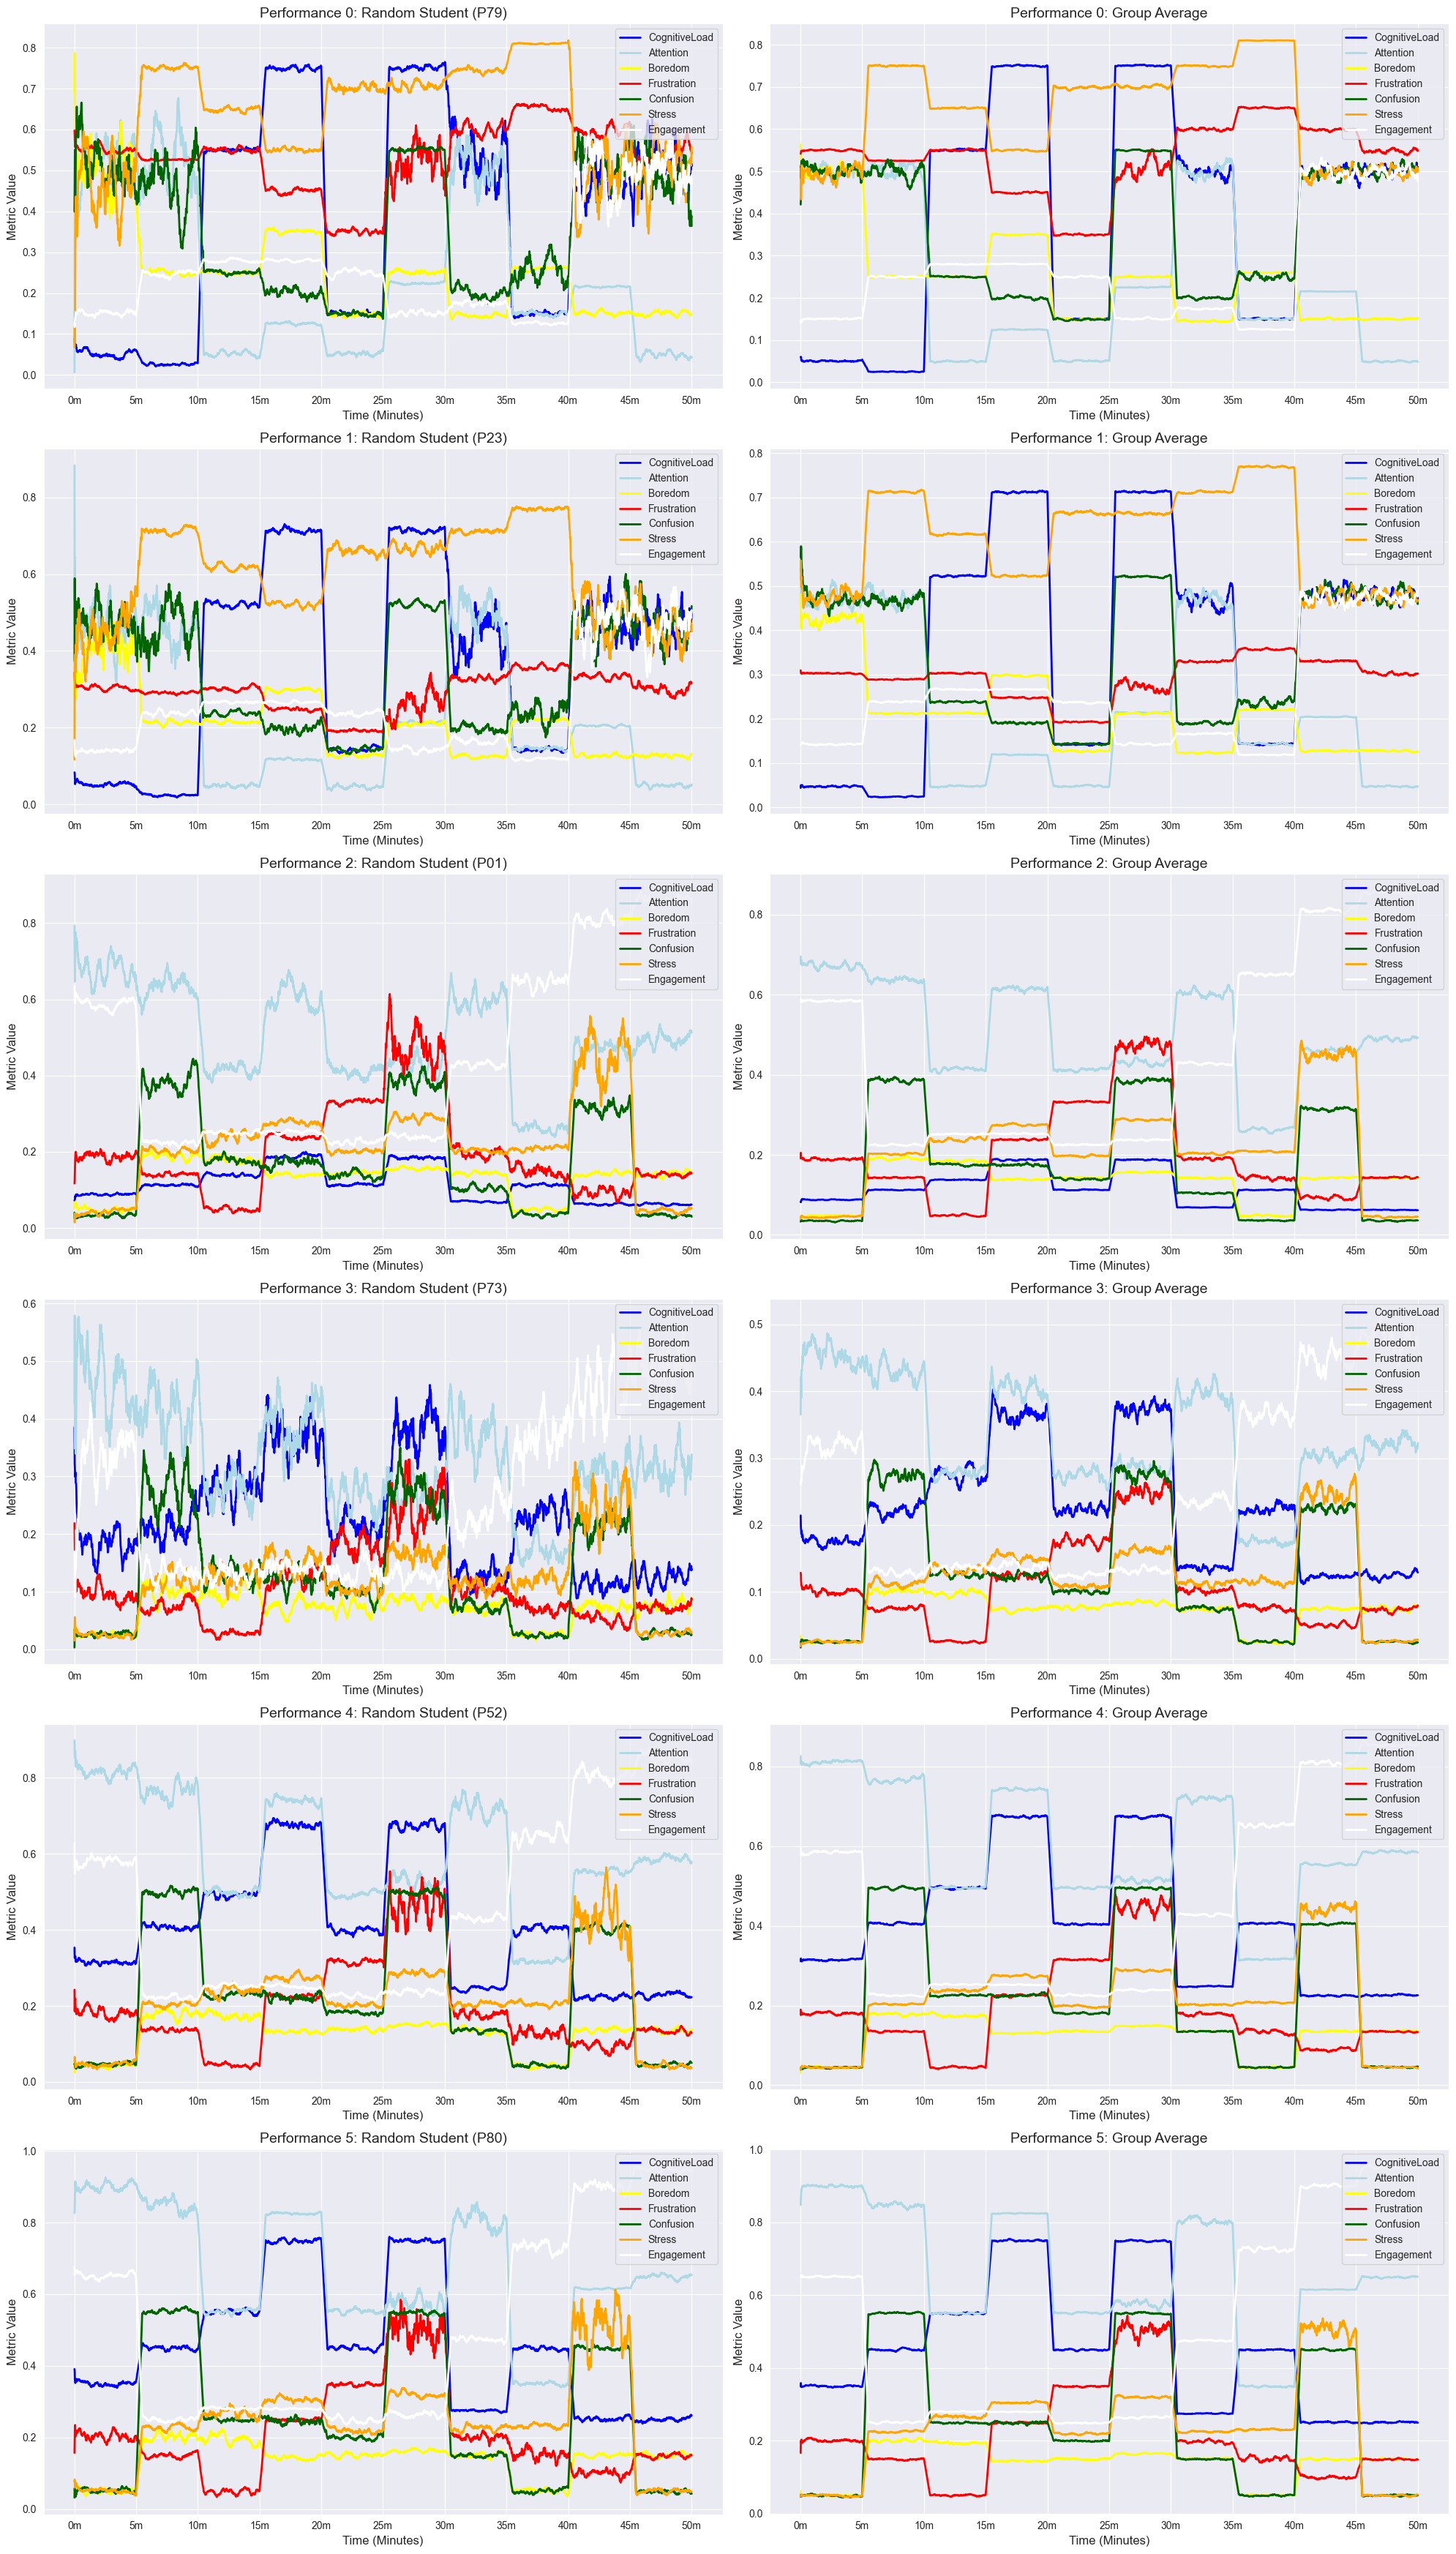

In [6]:

# Set up metrics and performance range
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
performance_levels = range(6)

# Color palette for metrics
custom_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#FFA500', '#FFFFFF']

# Set the window size for smoothing
window_size = 30

# Step 3: Create a 6-row layout with 2 plots per row, since Performance=6 is never recorded
fig, axes = plt.subplots(6, 2, figsize=(20, 35))  # 7 rows, 2 columns (one for random student, one for group average)

# Set the ticks for the x-axis to display every 300 seconds
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds

for performance, ax_row in zip(performance_levels, axes):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    ### Plot 1: Random Student ###
    random_student = random.choice(performance_group['Source'].unique())  # Randomly pick one student
    student_data = performance_group[performance_group['Source'] == random_student]
    
    # Apply a rolling window to smooth the data for the random student
    smoothed_student_data = student_data.copy()
    smoothed_student_data[metrics] = student_data[metrics].rolling(window=window_size, min_periods=1).mean()
    
    # Plot each metric for the random student
    for metric, color in zip(metrics, custom_palette):
        sns.lineplot(x=smoothed_student_data['Time'], y=smoothed_student_data[metric], 
                     ax=ax_row[0], label=metric, color=color, linewidth=2)
    
    ax_row[0].set_title(f'Performance {performance}: Random Student ({random_student})', fontsize=14)
    ax_row[0].set_ylabel('Metric Value', fontsize=12)
    ax_row[0].legend(loc='upper right')
    ax_row[0].set_xticks(x_ticks)
    ax_row[0].set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax_row[0].set_xlabel('Time (Minutes)', fontsize=12)
    
    ### Plot 2: Group Average ###
    # Compute the average of each metric for the group and apply a rolling window
    group_averages = performance_group.groupby('Time')[metrics].mean()
    smoothed_group_averages = group_averages.rolling(window=window_size, min_periods=1).mean()
    
    # Plot the smoothed averages for the group
    for metric, color in zip(metrics, custom_palette):
        sns.lineplot(x=smoothed_group_averages.index, y=smoothed_group_averages[metric], 
                     ax=ax_row[1], label=metric, color=color, linewidth=2)
    
    ax_row[1].set_title(f'Performance {performance}: Group Average', fontsize=14)
    ax_row[1].set_ylabel('Metric Value', fontsize=12)
    ax_row[1].legend(loc='upper right')
    ax_row[1].set_xticks(x_ticks)
    ax_row[1].set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax_row[1].set_xlabel('Time (Minutes)', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


Next, we will show two radar charts, one for each studentm and the other showing the average metrics for each performance group

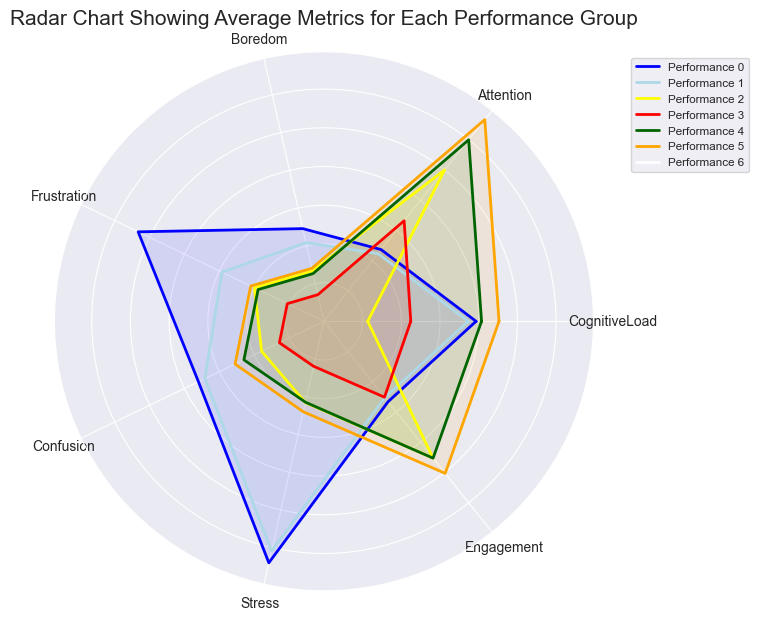

In [7]:
# Radar chart for a single student's profile
def plot_radar_chart(df, student):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
    student_data = df[df['Source'] == student][metrics].mean()

    # Radar chart setup
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    values = student_data.values.flatten().tolist()
    values += values[:1]
    
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    plt.title(f'Radar Chart for {student}')
    plt.show()


# USE THIS CODE TO PLOT SPECIFIC STUDENTS
"""
for i in range(1,81):
    if i < 10:
        plot_radar_chart(df, f'P0{i}')
    else:
        plot_radar_chart(df, f'P{i}')
"""

def plot_grouped_radar_charts(df):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Set up the radar chart figure
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    
    # Assign colors for the performance groups (0 to 6) using a distinct color palette
    colors = ['blue', 'lightblue', 'yellow', 'red', 'darkgreen', 'orange', 'white']
    
    # Plot each performance group (0 to 6)
    for performance in range(7):
        group_data = df[df['Performance'] == performance][metrics].mean()
        values = group_data.values.flatten().tolist()
        values += values[:1]  # Closing the radar chart

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Performance {performance}', color=colors[performance])
        ax.fill(angles, values, alpha=0.1, color=colors[performance])  # Light fill for clarity

    # Set the metric names around the plot
    ax.set_yticklabels([])  # Remove radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Add a title
    plt.title('Radar Chart Showing Average Metrics for Each Performance Group', size=15)
    
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
    
    # Show the plot
    plt.show()

plot_grouped_radar_charts(df)

And finally, a bar chart showing average values of metrics by performance group

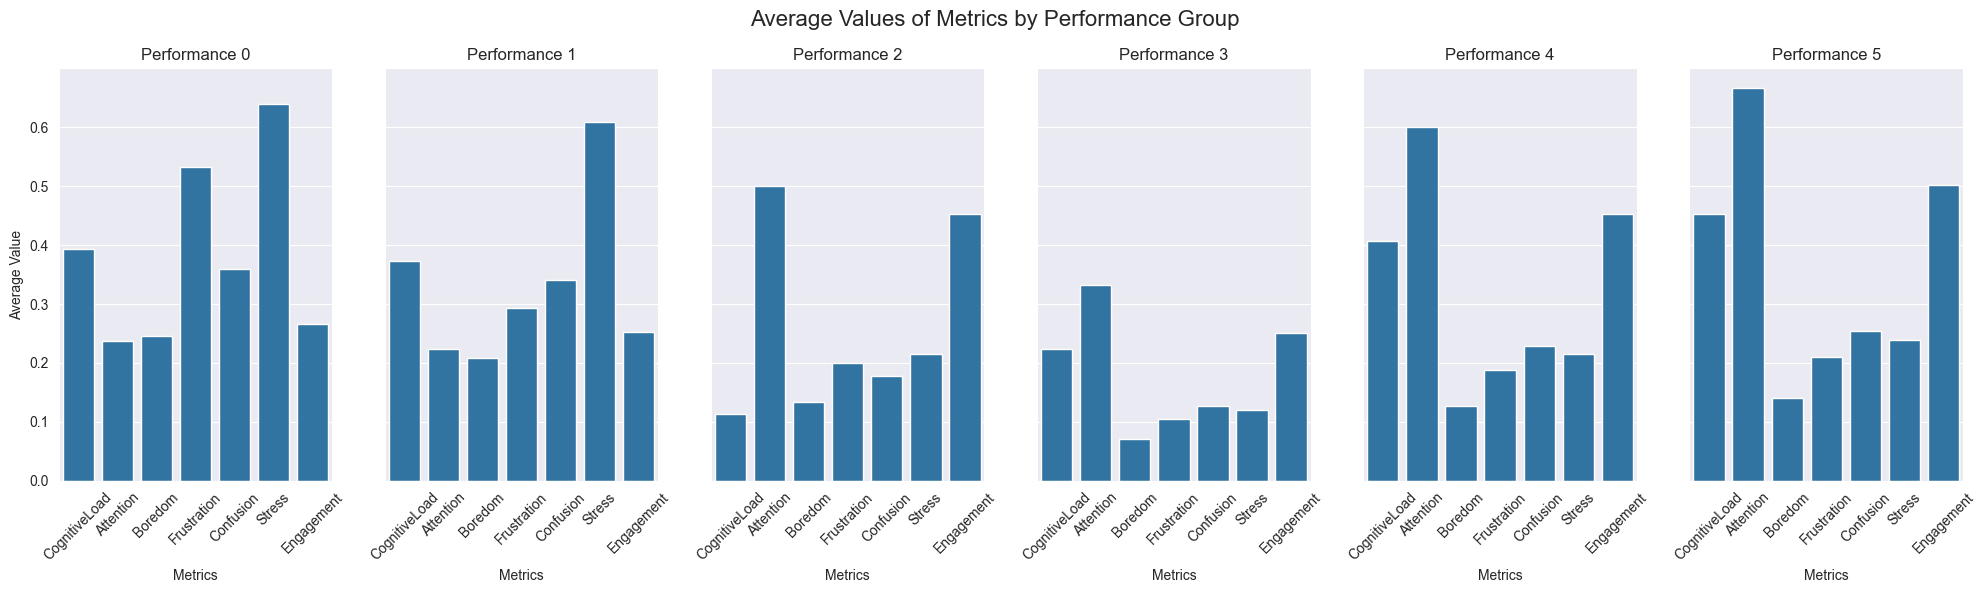

In [8]:

# Bar chart for average values of metrics by performance group
def plot_average_metrics_by_group(df):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
    performance_groups = df['Performance'].unique()
    
    # Set up figure for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(performance_groups), figsize=(20, 6), sharey=True)
    
    # Loop through each performance group and create a barplot for each
    for i, performance in enumerate(sorted(performance_groups)):
        avg_values = df[df['Performance'] == performance][metrics].mean()
        sns.barplot(ax=axes[i], x=avg_values.index, y=avg_values.values)
        axes[i].set_title(f'Performance {int(performance)}')
        axes[i].set_xlabel('Metrics')
        
        # Set tick positions before adding tick labels
        axes[i].set_xticks(range(len(metrics)))  # Set tick positions to match the number of metrics
        axes[i].set_xticklabels(avg_values.index, rotation=45)  # Add metric labels after ticks are set

        if i == 0:
            axes[i].set_ylabel('Average Value')
    
    plt.suptitle('Average Values of Metrics by Performance Group', size=16)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_metrics_by_group(df)



## Real time graph
This graph would show the mean of the values that are currently being processed, it's usefulness and objective will be explained in the document.

Take into account that in a real scenario (which is commented), the script would need to access a json or similar file in which the data is being stored in real time, moreover, mutex should also be implemented to avoid race conditions. But since this is only an example, we wont get into those details and just use the csv file to make a demostration of how it works

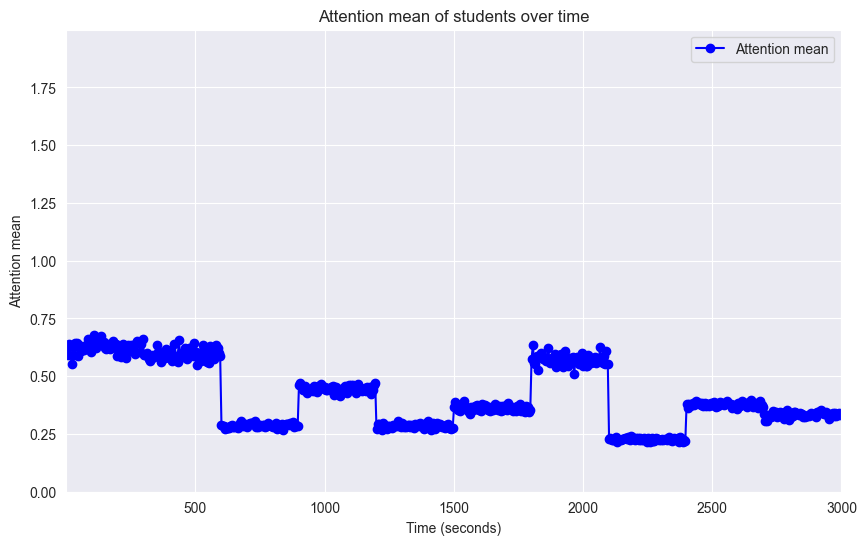

In [9]:
# Initial config (nº of students and desired metric)
num_students = 80 # int(input("Number of students: ")) 
statistic = 'Attention' # input("Desired Metric (ej. 'Attention', 'Boredom'): ")  
step_size = 5  # Time step

# For the simulation we will use the data from our dataset
df = pd.read_csv("combined_dataset.csv")

# Array for time and mean
time_points = []
statistic_means = []

# Loop for updating the graph
for current_time in range(df['Time'].min(), df['Time'].max() + 1, step_size):
    # Filter by desired time
    time_filter = df[df['Time'] == current_time].head(num_students)
    
    if len(time_filter) > 0:
        statistic_mean = time_filter[statistic].mean()
        time_points.append(current_time)
        statistic_means.append(statistic_mean)
        
        # Update the graph
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(time_points, statistic_means, marker='o', color='b', label=f'{statistic} mean')
        plt.title(f"{statistic} mean of students over time")
        plt.xlabel("Time (seconds)")
        plt.ylabel(f"{statistic} mean")
        plt.xlim(df['Time'].min(), df['Time'].max())
        plt.ylim(0, df[statistic].max() + 1)
        plt.legend()
        plt.grid(True)
        plt.show()
        
        
        time.sleep(1)  # Time to update the graph
